# Lab 5

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy as sci

from scipy.stats import f_oneway

import plotly.express as px

## Question 1

This question will center around analysis of the `geyser` dataset in base `seaborn` package.  First download the dataset and name as `geyser_df`.


In [2]:
geyser_df = sns.load_dataset('geyser')

geyser_df.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


### Part A

Create a scatterplot of the `geyser_df` that plots `waiting` on the x-axis and `duration` on the y-axis.  Make the color of the dot depend on the `kind` variable, use non-base coloring, and include a legend.  Be sure to label the x- and y- axes and give your graph a title.

Text(0.5, 1.0, 'Scatterplot of Seaborn Geyser Dataset')

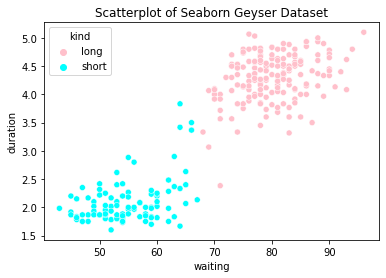

In [3]:
sns.set_palette( ('pink', 'cyan') ) 
scatterplot = sns.scatterplot(data = geyser_df, x = 'waiting', y = 'duration', hue = 'kind')
scatterplot.set_title("Scatterplot of Seaborn Geyser Dataset")



### Part B

Based on the plot above, you see that there is a vast difference in the `duration` of long and short geyser events.  Before you conduct an ANOVA test, you want to compare side-by-side boxplots.  Plot `kind` on the x-axis and `duration` on the y-axis.  Use `kind` as hue of the boxplot.  Name the legend and place it in a spot that does not overlap any of the data.

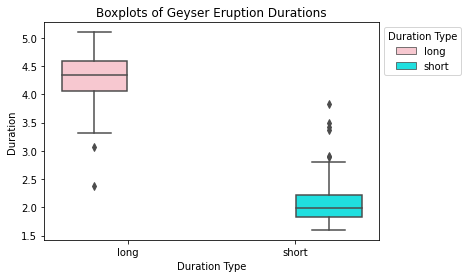

In [4]:
sns.set_palette( ('pink', 'cyan') ) 
boxplots = sns.boxplot(data = geyser_df, x = 'kind', y = 'duration', hue = 'kind')
boxplots.set(xlabel = "Duration Type", ylabel = "Duration", title = "Boxplots of Geyser Eruption Durations")
plt.legend(title = "Duration Type", loc = 2, bbox_to_anchor = (1,1))


### Part C

Using Pandas "groupby" option, group the dataset `geyser_df` on `kind` and then find the mean, median, standard deviation and variance of the duration for both kinds of geyser events.

In [5]:


geyser_by_kind = geyser_df.groupby("kind", as_index = False)

var = geyser_by_kind.var()

std = geyser_by_kind.std()

mean = geyser_by_kind.mean()

median = geyser_by_kind.median()

summary_stats = pd.concat([var, std, mean, median], axis = 1)

summary_stats.columns.values[0:8] = ['Duration Variance', "Wait Time Variance", "Duration Std Dev", "Wait Time Std Dev",
                                     "Duration Mean", "Wait Time Mean", "Duration Median", "Wait Time Median"]
summary_stats

,Duration Variance,Wait Time Variance,Duration Std Dev,Wait Time Std Dev,Duration Mean,Wait Time Mean,Duration Median,Wait Time Median,waiting,kind,duration,waiting
0,long,0.178656,31.666905,long,0.422677,5.627335,long,4.29793,80.284884,long,4.350,80.0
1,short,0.155837,34.755051,short,0.394762,5.895341,short,2.09433,54.750000,short,1.983,54.0


### Part D

Suppose you want to test:

  H$_0$: Mean duration time of long and short geyser events are the same <br>
  H$_a$: Mean duration time of long and short geyser events are not the same

Conduct the ANOVA test at the 5% level of significance.  Include a p-value in your response.

In [6]:
duration_long = (geyser_by_kind.get_group('long'))['duration'] 

duration_short = (geyser_by_kind.get_group('short'))['duration'] 

anova = f_oneway(duration_long, duration_short)

anova = (pd.DataFrame(anova)).transpose() 

type(anova)

anova.columns = ['F Statistic','P Value']

anova.index = ['One Way Anova Test']

anova

,F Statistic,P Value
One Way Anova Test,1803.178126,1.599857e-121


### Part E
Is there evidence of a difference between the long and short geyser event means?

Yes.  The p value is very small, indicating that that there is very little chance such a difference would occur purely by random chance.  So, assuming there isn't some bias in the data set, there is good evidence of a true difference.

## Question 2

This question will center around analysis of the car crashes dataset in base seaborn package. First download the dataset and name as `carcrash_data`.

You can read about the variables here:  https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset.  The variables reported include:

- `total`: Number of drivers involved in fatal collisions per billion miles
- `speeding`: Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding
- `alcohol`: Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired
- `not_distracted`: Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted
- `no_previous`: Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents
- `ins_premium`: Car Insurance Premiums in dollars
- `ins_losses`: Losses incurred by insurance companies for collisions per insured driver in dollars
- `abbrev`: State

In [7]:
carcrash_data = sns.load_dataset('car_crashes')

carcrash_data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Part A

Create a new column variable, `region`, which will classify the state based on the following definitions:

- `Northeast`: ME, NH, VT, MA, RI, CT, NY, NJ, and PA
- `Midwest`: OH, MI, IN, WI, IL, MN, IA, MO, ND, SD, NE, and KS
- `South`: DE, MD, VA, WV, KY, NC, SC, TN, GA, FL, AL, MS, AR, LA, TX, and OK
- `West`: MT, ID, WY, CO, NM, AZ, UT, NV, CA, OR, WA, AK, and HI

Create a column variable, `premium`, that reports "Above average" if the `ins_premium` value is above the average of the `ins_premium` and "Below average" elsewise.

Remove the row corresponding to "DC".

In [8]:
carcrash_data = sns.load_dataset('car_crashes')

Northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
Midwest= ['OH', 'MI', 'IN', 'WI', 'IL', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
South = ['DE', 'MD', 'VA', 'WV', 'KY', 'NC', 'SC', 'TN', 'GA', 'FL', 'AL', 'MS', 'AR', 'LA', 'TX', 'OK']
West = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']

carcrash_data['region'] = ['Northeast' if i in Northeast 
                else 'Midwest' if i in Midwest 
                else 'South' if i in South
                else 'West' if i in West
                else 0 
                for i in carcrash_data['abbrev']] 

average_premium = carcrash_data['ins_premium'].mean()

carcrash_data['premium'] = ['Above average' if i > average_premium
                else 'Average' if i == average_premium 
                else 'Below average' 
                for i in carcrash_data['ins_premium']] 

carcrash_data = carcrash_data.drop(8) # remove row with DC

carcrash_data.head()


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,region,premium
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,Below average
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Above average
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Above average
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,Below average
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Below average


### Part B

Graph facetted histograms based on `ins_losses` variable.  Include 10 bins and color the histograms based on `region`.  The rows should represent `premium` and the columns should represent `region`, both variables created in part a.  On the y-axis, showcase the density.

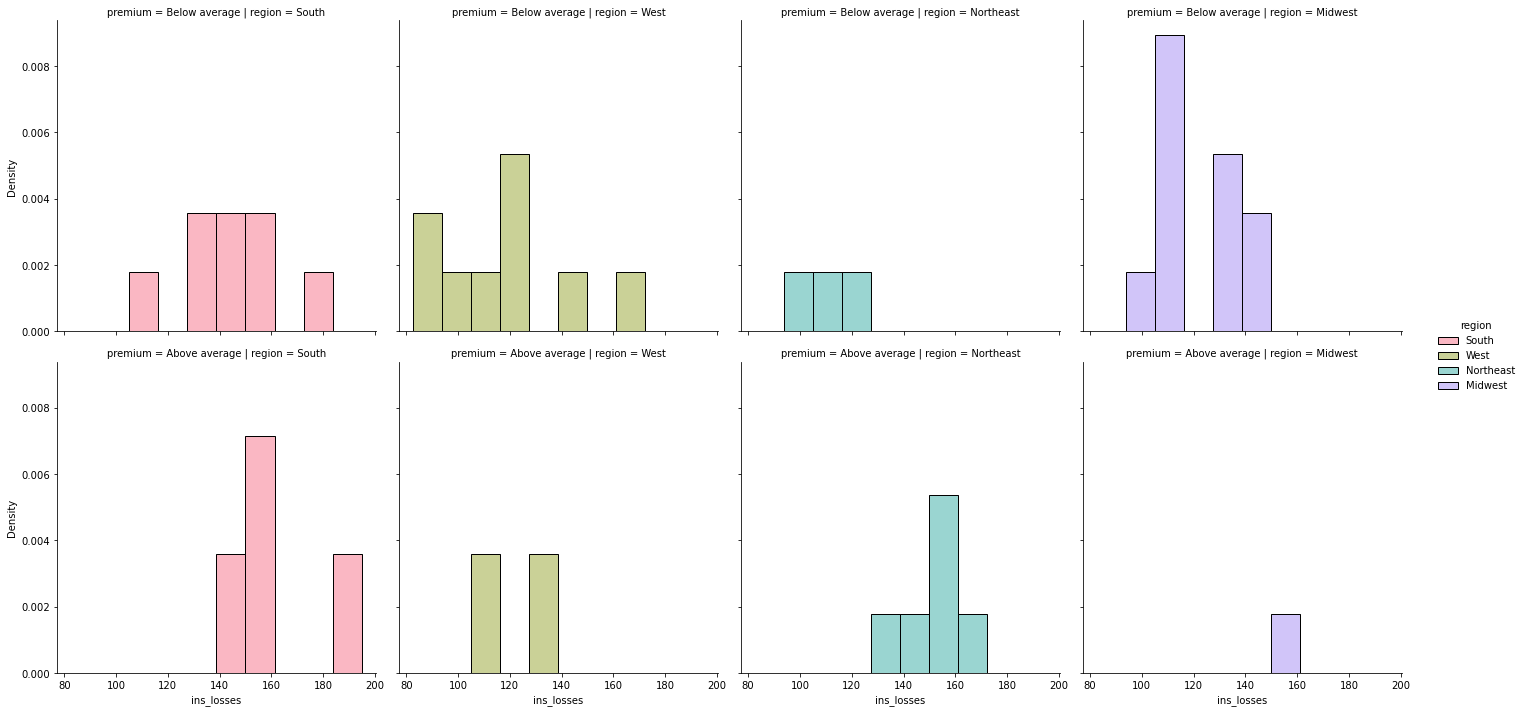

In [9]:
sns.displot(carcrash_data, x = 'ins_losses', stat = 'density', col = 'region', row = 'premium', hue = 'region', bins = 10)

### Part C

Create a pair plot of `carcrash_df` comparing `ins_premium`, `ins_losses`, `total`, `speeding`, `alcohol`.  Colorize based on `region`.

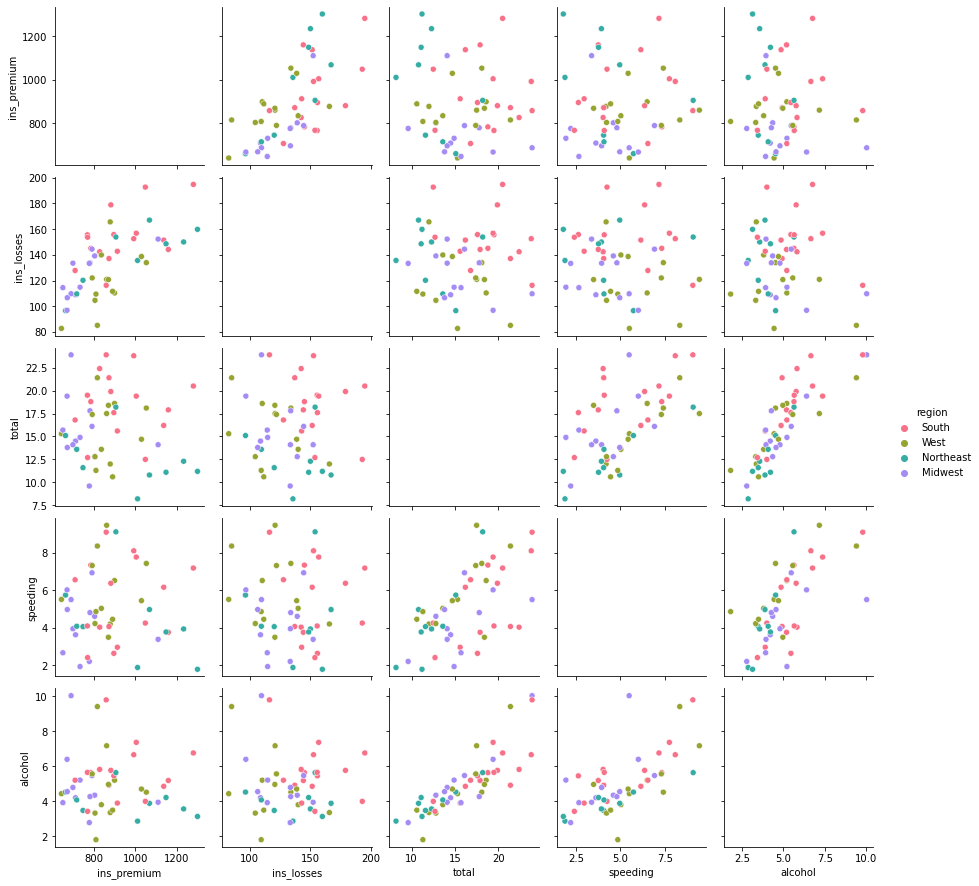

In [10]:
sns.pairplot(carcrash_data, hue = 'region', diag_kind = 'scatter', 
             vars = ['ins_premium', 'ins_losses', 'total', 'speeding', 'alcohol'])


### Part D

Analyzing the pairplot above, which variables do you think are highly correlated?  Does the region seem to have any difference on the relationship between the variables?

Ans: 


The ones that look highly correlated, based on the scatterplots, are total and alcohol, and speeding and alcohol.  There's also what look to be weaker correlations between speeding and total, and ins_premium and ins_losses.  As for the region, the only pattern I see is that the south seems to have more outliers (or at least points farther away from the "clustered" data, even if not technically outliers) which will decrease the overall correlation.

## Question 3

The following questions will be analyzing the `planets` data in Seaborn package.  Import the data using the code below:

In [11]:
planets_data = sns.load_dataset('planets')
sns.set_theme(style = "ticks", palette = "pastel")


### Part A

First, clean the data so that none of the columns have NaN response values.  Name this new dataset `planets_df`.  Then add a variable called `dis_flag` that returns "Far" if the distance is more then the average and "Not Far" if the distance is less than the average.

In [12]:
warnings.filterwarnings('ignore')

planets_df = planets_data.dropna()

planets_df['dis_flag'] = ['Far' if i > planets_df.loc[:,('distance')].mean()
                          else 'Not Far'
                          for i in planets_df['distance']]

planets_df.head()



,method,number,orbital_period,mass,distance,year,dis_flag
0,Radial Velocity,1,269.300,7.10,77.40,2006,Far
1,Radial Velocity,1,874.774,2.21,56.95,2008,Far
2,Radial Velocity,1,763.000,2.60,19.84,2011,Not Far
3,Radial Velocity,1,326.030,19.40,110.62,2007,Far
4,Radial Velocity,1,516.220,10.50,119.47,2009,Far


### Part B

Using a layered histogram, plot the density distribution of `year` with the overlapping bars representing the `dis_flag` variable.  Include a title, legend, axis labels.

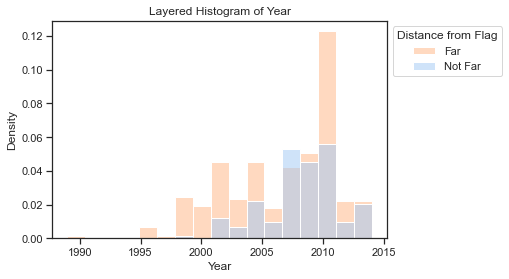

In [13]:
year_plot = sns.histplot(planets_df, x = 'year', hue = 'dis_flag', stat = 'density')

year_plot.set(title = "Layered Histogram of Year", xlabel = "Year", ylabel = "Density")

plt.legend(labels = ['Far', 'Not Far'], title = "Distance from Flag", loc = 2, bbox_to_anchor = (1,1))


### Part C

Does it appear there is a trend between year and distance of the planet?  When are "far" planets mostly found?

Ans:


Yes.  There is a huge spike in the amount of far planets discovered around the year 2010.  There also more far planets found before then than afterwards.

## Question 4

Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties. He described the article as being intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough."



In [14]:
anscombe_df = sns.load_dataset("anscombe")

anscombe_df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


### Part A

Find the mean and variance of `x` and `y` grouping on the `dataset`.
Then, find the mean and variance of `x` and `y` without any grouping.

In [15]:
groupby_dataset = anscombe_df.groupby('dataset')

print((groupby_dataset.mean()))
print((groupby_dataset.var()))


           x         y
dataset               
I        9.0  7.500909
II       9.0  7.500909
III      9.0  7.500000
IV       9.0  7.500909
            x         y
dataset                
I        11.0  4.127269
II       11.0  4.127629
III      11.0  4.122620
IV       11.0  4.123249


In [16]:
print(anscombe_df.var())

print(anscombe_df.mean())

x    10.232558
y     3.837388
dtype: float64
x    9.000000
y    7.500682
dtype: float64


### Part B

Find the correlation between `x` and `y` grouped on `dataset`.
Then, find the correlation between `x` and `y` without any grouping.  Display your answers as correlation matrices.

In [17]:
#type(numpy.ndarray(groupby_dataset['y']))

#type(np.random.randint(0, 10, 50))

print(groupby_dataset[['x', 'y']].corr())

                  x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000


In [18]:
anscombe_df.corr()

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


### Part C

For each of the datasets, find the parameter estimates for the slope and y-intercept using `np.polyfit(x =, y =, d =)` where `d` is the degree.  Since we are plotting simple linear regression models, the degree we want is 1.  The output of `np.polyfit()` will be of the form: `array([a, b])`.  `a` output will be the slope and `b` output will be y-intercept.

Display your calculated slope and y-intercept values in a dataframe with the dataset as rows and slope and y-intercept as columns.  Include labeling.

In [19]:
I = (groupby_dataset.get_group('I'))

II = (groupby_dataset.get_group('II'))

III = (groupby_dataset.get_group('III'))

IV = (groupby_dataset.get_group('IV'))



D1 = np.polyfit(x = list(I['x']), y = list(I['y']), deg = 1)
D2 = (np.polyfit(x = list(II['x']), y = list(II['y']), deg = 1))
D3 = (np.polyfit(x = list(III['x']), y = list(III['y']), deg = 1))
D4 = (np.polyfit(x = list(IV['x']), y = list(IV['y']), deg = 1))

D1D2 = pd.concat([pd.DataFrame(D1).transpose(), pd.DataFrame(D2).transpose()])

D2D3 = pd.concat([pd.DataFrame(D2).transpose(), pd.DataFrame(D3).transpose()])

slope_intercepts = pd.concat([D1D2, D2D3])

slope_intercepts.columns = ["Slope", "Y Intercept"]

slope_intercepts.index = ['I', 'II', 'III', 'IV']

slope_intercepts

,Slope,Y Intercept
I,0.500091,3.000091
II,0.500000,3.000909
III,0.500000,3.000909
IV,0.499727,3.002455


### Part D

Use facet graphing to graph a scatterplot of `x` versus `y` for each dataset. Colorize each of the scatterplots based on the `dataset`.  Include the linear regression equation on each of the graphs but do not include the confidence bands.

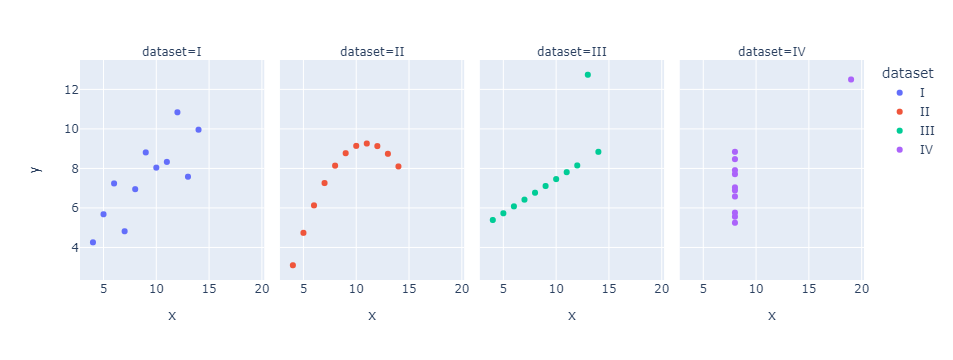

In [29]:
fig = px.scatter(anscombe_df, x="x", y="y", color="dataset", facet_col="dataset", trendline = ")

fig.show()



### Part E

What does this exercise show you about relying on numeric outputs for statistical analysis?

Ans:  